In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv("E:\Edrive\Sudhanshu\Datatrained Projects/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

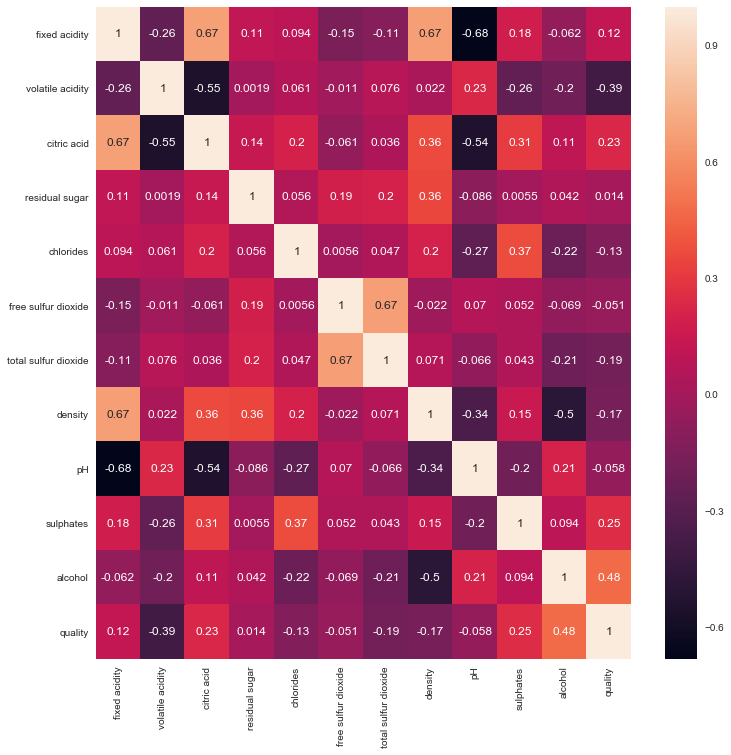

In [7]:
correlation = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),color = "k", annot=True)

In [8]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

# Based on Correlation - fixed acidity,citric acid,residual sugar,sulphates,alcohol have a good relationship with Quality

In [9]:
for i in range(len(df)):
    if df.loc[i,'quality']>=7:
        df.loc[i,'quality']='good'
    else:
        df.loc[i,'quality']='bad'

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [11]:
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler

In [12]:
le=LabelEncoder()
df['quality']=le.fit_transform(df['quality'])

In [13]:
X1 = df[['fixed acidity','citric acid','residual sugar','sulphates','alcohol']]
Y = df['quality']

In [14]:
#scaling the Xvalue
sc=StandardScaler()
X=sc.fit_transform(X1)

In [15]:
X =  pd.DataFrame(X, columns=['fixed acidity','citric acid','residual sugar','sulphates','alcohol'])

In [16]:
X

,fixed acidity,citric acid,residual sugar,sulphates,alcohol
0,-0.528360,-1.391472,-0.453218,-0.579207,-0.960246
1,-0.298547,-1.391472,0.043416,0.128950,-0.584777
2,-0.298547,-1.186070,-0.169427,-0.048089,-0.584777
3,1.654856,1.484154,-0.453218,-0.461180,-0.584777
4,-0.528360,-1.391472,-0.453218,-0.579207,-0.960246
5,-0.528360,-1.391472,-0.524166,-0.579207,-0.960246
6,-0.241094,-1.083370,-0.666062,-1.169337,-0.960246
7,-0.585813,-1.391472,-0.949853,-1.110324,-0.397043
8,-0.298547,-1.288771,-0.382271,-0.520193,-0.866379
9,-0.470907,0.457144,2.526589,0.837107,0.072294


In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
print(lr.intercept_)
print(lr.coef_)

0.138185438284
[ 0.02978431  0.03744787  0.00067423  0.04188173  0.13975516]


In [22]:
train_pred = regressor.predict(X_train)
print(train_pred)
test_pred = regressor.predict(X_test) 
print(test_pred)

[ 0.0691427  -0.01677153 -0.03865594 ...,  0.04107305  0.25368063
 -0.04807916]
[  1.78390252e-02  -6.03882725e-02  -6.90724811e-02   4.22033616e-01
   2.50128259e-01   5.43495236e-01   2.81282024e-01   3.64113205e-01
   2.09031662e-01   7.51489074e-02   1.22435738e-01   2.49836809e-01
   4.02606340e-01  -1.07815678e-01   4.77485044e-03  -4.26664921e-02
   3.50503632e-01   1.24136025e-01   1.56868024e-01   1.19347068e-01
   2.04056544e-01   1.46835138e-01  -4.60253697e-02   1.55684245e-01
   2.27272706e-01   1.57518620e-02   6.13245311e-03   1.68919543e-02
   4.65052658e-01   9.43726511e-02   9.01180941e-02  -9.16590941e-02
   1.74495950e-01   1.02068582e-01   5.84913739e-02   3.37894262e-01
   2.16106198e-01   3.98806228e-01  -7.46355794e-02   6.05052752e-02
   4.64410300e-01  -3.34525567e-02   1.79106776e-01   2.18598367e-01
   3.37791807e-01   2.49564397e-01   1.45618552e-01   3.20341096e-01
   4.58963521e-03   9.13930281e-02   1.23852543e-01   2.63625351e-01
   1.21264796e-02   5.2

In [39]:
prediction=lr.predict(X_test)

In [41]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(Y_test,prediction))
print('MSE', metrics.mean_squared_error(Y_test,prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

MAE 0.219439181781
MSE 0.102419010252
RMSE 0.32002970214


In [49]:
coeffecients = pd.DataFrame(lr.coef_,X.columns, columns = ['Coefficients'])

In [50]:
coeffecients

,Coefficients
fixed acidity,0.029784
citric acid,0.037448
residual sugar,0.000674
sulphates,0.041882
alcohol,0.139755


In [ ]:
#Alcohol is best variable to influence the quality of red wines